# Peak power minimization with multiple harmonic load

In [1]:
import picos as pc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from truss import var, display #my package

np.random.seed(1)

In [2]:
E = 2.5e4 # young module
rho = 1. #density
m = 1. #total mass
omega_max = 15. #highest angular frequency of the loads
Nh = 2 # number of harmonics

omega = omega_max / Nh

## power function
we consider the following truss:

In [3]:
x = np.array([0,3]+[0,1,2,3]*2+[0,3])
y = np.array([0]*2+[-1]*4+[-2]*4+[-3]*2)
nodes = var.nodes(x,y)
nodes.set_kinematic([0,1])
n1=[0,0,1,1,2,2,2,3,3,4,4,4,4,5,6,6,7,7,8,8,9]
n2=[2,3,4,5,3,6,7,4,7,5,7,8,9,9,7,10,8,10,9,11,11]
elements = var.elements(n1,n2)

t = var.truss(nodes, elements)
t.set_density(rho)
t.set_module_young(E)
t.assemble()
display.plot_truss(t)

/home/shenyuan/project/code/package/truss_exp/src/truss/display.py:13: UserWarning: value of cross section area not specified, display with default value
  warnings.warn("value of cross section area not specified, display with default value")


Let's build a harmonic load.

In [16]:
cf = np.zeros((Nh, t.nodes.Nn*t.nodes.dim), dtype="complex128")
real_f = np.zeros((Nh*2, t.nodes.Nn*t.nodes.dim))
ndof = t.nodes.ndof

for k in range(0,Nh):
    cf[k,t.nodes.dof]=np.random.normal(size=ndof)+1j* np.random.normal(size=ndof)
    real_f[2*k, t.nodes.dof] = 2*cf[k,t.nodes.dof].real
    real_f[2*k+1, t.nodes.dof] = -2*cf[k,t.nodes.dof].imag
cf /= np.linalg.norm(cf, axis=1)[:,None]
t.nodes.set_dynamic(cf, omega)

The method `find_feasible_design` allows you to find a feasible design (of total mass less than or equal to `m`) after asigning the time varying load and assembling the matrices.


1.0000000000000002


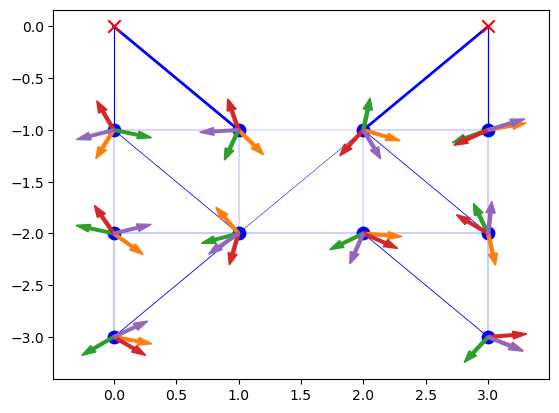

In [17]:
t.find_feasible_design(m, verbosity=False)
print(t.total_mass)
display.plot_truss(t, real_f)

In [18]:
#now solve for the nodal velocities 
cv = t.solve_velocity()

In [19]:
time_step = np.linspace(0, 2*np.pi, 150)
p = var.power_function(cf,cv,time_step)


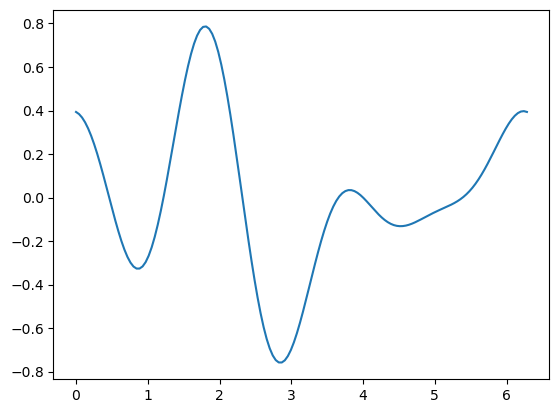

In [20]:
plt.plot(time_step,p)
plt.show()